In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
path = '/content/gdrive/MyDrive/HateSpeechACM/englishdataset.csv'

In [3]:
print(path)

/content/gdrive/MyDrive/HateSpeechACM/englishdataset.csv


In [4]:
import pandas as pd
url='/content/gdrive/MyDrive/HateSpeechACM/englishdataset.csv'

In [5]:
import os, shutil
import pandas as pd
dataset=pd.read_csv(url)
dataset

,tweet,class
0,West Bengal Doctor Crisis: Protesting doctors ...,NOT
1,68.5 million people have been forced to leave ...,NOT
2,"You came, you saw .... we will look after the ...",NOT
3,We'll get Brexit delivered by October 31st. ...,NOT
4,Fuck you. Go back to the dark ages you cow @IB...,HOF
...,...,...
1148,Each of the divorce must be pronounced with a ...,NOT
1149,He is 62-yr-old Harswaroop Chauhan. His only s...,NOT
1150,"Peace of graveyard or peace of mind, @asadowai...",NOT
1151,The humble #tribute on the sacrifice day of #J...,NOT


In [6]:
dataset.dropna(subset = ["tweet"], inplace=True)

In [7]:
dataset["class"].describe()

count     1153
unique       2
top        NOT
freq       865
Name: class, dtype: object

In [8]:
pd.unique(dataset["class"])

array(['NOT', 'HOF'], dtype=object)

In [9]:
dataset["class"].describe()

count     1153
unique       2
top        NOT
freq       865
Name: class, dtype: object

In [10]:
# Adding text-length as a field in the dataset
dataset['text length'] = dataset['tweet'].apply(len)
print(dataset.head())

                                               tweet class  text length
0  West Bengal Doctor Crisis: Protesting doctors ...   NOT          128
1  68.5 million people have been forced to leave ...   NOT          117
2  You came, you saw .... we will look after the ...   NOT           62
3  We'll get Brexit delivered by October 31st.   ...   NOT          146
4  Fuck you. Go back to the dark ages you cow @IB...   HOF          119


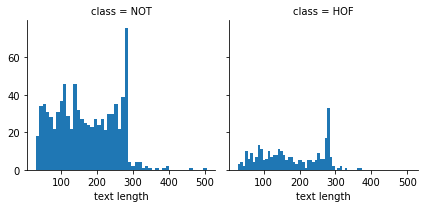

In [11]:
#Basic visualization of data using histograms
# FacetGrid- Multi-plot grid for plotting conditional relationships
import seaborn as sns
import matplotlib.pyplot as plt
graph = sns.FacetGrid(data=dataset, col='class')
graph.map(plt.hist, 'text length', bins=50)

(array([   0,    1,    2, ..., 1150, 1151, 1152]),
 <a list of 1153 Text major ticklabel objects>)

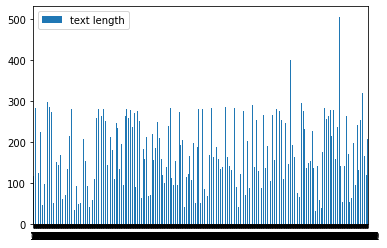

In [12]:
dataset.plot(kind='bar', stacked=True)
plt.xticks(rotation=0, ha='center')

In [ ]:
tweet=dataset.tweet

In [ ]:
# remove special characters, numbers, punctuations
dataset['tweet'] = dataset['tweet'].str.replace("[^a-zA-Z#]", " ")

In [ ]:
dataset['tweet']

0       West Bengal Doctor Crisis  Protesting doctors ...
1            million people have been forced to leave ...
2       You came  you saw      we will look after the ...
3       We ll get Brexit delivered by October   st    ...
4       Fuck you  Go back to the dark ages you cow  IB...
                              ...                        
1148    Each of the divorce must be pronounced with a ...
1149    He is    yr old Harswaroop Chauhan  His only s...
1150    Peace of graveyard or peace of mind   asadowai...
1151    The humble #tribute on the sacrifice day of #J...
1152    Happy Birthday to Sh  nitin gadkari Ji  God bl...
Name: tweet, Length: 1153, dtype: object

In [ ]:
#Removing Short Words
dataset['tweet'] = dataset['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [ ]:
#Tokenization
tokenized_tweet = dataset['tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [West, Bengal, Doctor, Crisis, Protesting, doc...
1    [million, people, have, been, forced, leave, t...
2          [came, will, look, after, fort, Good, luck]
3    [Brexit, delivered, October, Help, build, move...
4    [Fuck, back, dark, ages, IBNLiveRealtime, Rape...
Name: tweet, dtype: object

In [ ]:
#Stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [west, bengal, doctor, crisi, protest, doctor,...
1    [million, peopl, have, been, forc, leav, their...
2          [came, will, look, after, fort, good, luck]
3    [brexit, deliv, octob, help, build, movement, ...
4    [fuck, back, dark, age, ibnliverealtim, rape, ...
Name: tweet, dtype: object

In [ ]:
dataset["class"]=dataset["class"].replace(to_replace =['NOT'], value =0)
dataset["class"]=dataset["class"].replace(to_replace =['HOF'], value =1)

In [ ]:
dataset['class']

0       0
1       0
2       0
3       0
4       1
       ..
1148    0
1149    0
1150    0
1151    0
1152    0
Name: class, Length: 1153, dtype: int64

In [ ]:
X=dataset['tweet']
y=dataset['class']

In [ ]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.65,test_size=0.35, random_state=101)
print ("X_train: ", X_train)
print ("y_train: ", y_train)
print("X_test: ", X_test)
print ("y_test: ", y_test)

X_train:  361                  back England miserable excuse human
134    absolutely right that government does support ...
621    Stop lying genuinely attach huge importance Go...
155    akashbanerjee video which lists points underst...
737    friend sends text asking does risk losing inst...
                             ...                        
575    VtvGujarati isudan gadhvi golanihemant patelke...
973    Under Islamic divorce pronounced twice which o...
75     Basically Mamata just tags protest against wha...
599    This zomato these people give gyaan twitter ab...
863    What happened Delhi happened Parliament Happen...
Name: tweet, Length: 749, dtype: object
y_train:  361    1
134    0
621    0
155    0
737    0
      ..
575    0
973    0
75     1
599    0
863    0
Name: class, Length: 749, dtype: int64
X_test:  686     Boris Johnson faces Supreme Court make stand t...
821     century realDonaldTrump congratulate Twitter w...
407     Scottish Conservative leader RuthDavidsonM

In [ ]:
import gensim
tokenized_tweet = dataset['tweet'].apply(lambda x: x.split()) # tokenizing 

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2, # Ignores all words with total frequency lower than 2.                                  
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 34
) 

model_w2v.train(tokenized_tweet, total_examples= len(dataset['tweet']), epochs=20)

(266902, 386120)

In [ ]:
model_w2v.wv.most_similar(positive="hate")

[('ideas', 0.9838637113571167),
 ('supporting', 0.9837464094161987),
 ('FLASH', 0.9830871820449829),
 ('Yeah', 0.9823205471038818),
 ('lack', 0.981480598449707),
 ('change', 0.981378436088562),
 ('shame', 0.9805724024772644),
 ('utter', 0.9793269634246826),
 ('semi', 0.979134202003479),
 ('terrorism', 0.9785573482513428)]

In [ ]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
import numpy as np
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(1153, 200)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix, accuracy_score
train_w2v = wordvec_df.iloc[:1153,:]
test_w2v = wordvec_df.iloc[1153:,:]

# splitting data into training and validation set 
xtrain_w2v, xvalid_w2v, ytrain, yvalid = train_test_split(train_w2v, dataset['class'], random_state=42, test_size=0.2)

In [ ]:
from sklearn import svm
svc = svm.SVC(kernel='rbf').fit(xtrain_w2v, ytrain) 
prediction = svc.predict(xvalid_w2v) 
f1_score(yvalid, prediction)

#classifiction Report

report = classification_report( yvalid, prediction)
print(report)
acc1=accuracy_score(yvalid,prediction)

print("SVM-RBF(word2vec), Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       172
           1       1.00      0.03      0.07        59

    accuracy                           0.75       231
   macro avg       0.88      0.52      0.46       231
weighted avg       0.81      0.75      0.66       231

SVM-RBF(word2vec), Accuracy Score: 0.7532467532467533


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1,10,100], 'kernel': ['linear','rbf']}]
grid_search = GridSearchCV(estimator= svc,
                          param_grid = parameters, scoring = 'accuracy',cv = 10)
grid_search = grid_search.fit(xtrain_w2v, ytrain)
print(grid_search.best_params_)
prediction = grid_search.predict(xvalid_w2v)  

#classifiction Report

report = classification_report( yvalid, prediction)
print(report)
acc1=accuracy_score(yvalid,prediction)

print("SVM(word2vec) after HT+GD, Accuracy Score:",acc1)

{'C': 100, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       172
           1       0.62      0.34      0.44        59

    accuracy                           0.78       231
   macro avg       0.71      0.63      0.65       231
weighted avg       0.76      0.78      0.75       231

SVM(word2vec) after HT+GD, Accuracy Score: 0.7792207792207793


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
svc = svm.SVC()

# Create the random grid
random_grid = {'C': [1,10,100], 
              'kernel': ['linear','rbf']}
              
rf_random = RandomizedSearchCV(estimator = svc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain_w2v, ytrain)
print(rf_random.best_params_)
prediction = rf_random.predict(xvalid_w2v) 

#classifiction Report

report = classification_report( yvalid, prediction)
print(report)
acc1=accuracy_score(yvalid,prediction)

print("SVM(word2vec) after HT+RS, Accuracy Score:",acc1)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.7s finished


{'kernel': 'linear', 'C': 100}
              precision    recall  f1-score   support

           0       0.80      0.95      0.86       172
           1       0.65      0.29      0.40        59

    accuracy                           0.78       231
   macro avg       0.72      0.62      0.63       231
weighted avg       0.76      0.78      0.75       231

SVM(word2vec) after HT+RS, Accuracy Score: 0.7792207792207793


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain) 
prediction = rf.predict(xvalid_w2v)


#classifiction Report

report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)

print("RF(word2vec), Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.80      0.97      0.87       172
           1       0.74      0.29      0.41        59

    accuracy                           0.79       231
   macro avg       0.77      0.63      0.64       231
weighted avg       0.78      0.79      0.76       231

RF(word2vec), Accuracy Score: 0.7922077922077922


In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(xtrain_w2v, ytrain)

print("best Params")
print(grid_search.best_params_)

prediction = grid_search.predict(xvalid_w2v)

#classifiction Report

report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)

print("RF(word2vec) after HT+GS, Accuracy Score:",acc1)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 10.1min finished


best Params
{'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.78      0.97      0.86       172
           1       0.69      0.19      0.29        59

    accuracy                           0.77       231
   macro avg       0.73      0.58      0.58       231
weighted avg       0.75      0.77      0.72       231

RF(word2vec) after HT+GS, Accuracy Score: 0.7705627705627706


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain_w2v, ytrain)

print("best Params")
print(rf_random.best_params_)

prediction = rf_random.predict(xvalid_w2v)

#classifiction Report
report = classification_report( yvalid, prediction )
print(report)
acc10=accuracy_score(yvalid,prediction)

print("RF(word2vec) after HT+RS, Accuracy Score:",acc10)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 14.6min finished


best Params
{'n_estimators': 646, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 27, 'bootstrap': True}
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       172
           1       0.68      0.29      0.40        59

    accuracy                           0.78       231
   macro avg       0.74      0.62      0.64       231
weighted avg       0.77      0.78      0.75       231

RF(word2vec) after HT+RS, Accuracy Score: 0.7835497835497836


In [ ]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
model = Sequential()
model.add(Embedding(500, 120, input_length = xtrain_w2v.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 120)          60000     
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 200, 120)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 176)               209088    
_________________________________________________________________
dense (Dense)                (None, 1)                 177       
Total params: 269,265
Trainable params: 269,265
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
batch_size=32
model.fit(xtrain_w2v, ytrain, epochs = 5, batch_size=batch_size, verbose = 'auto')

Epoch 1/5
29/29 [==============================] - 49s 830ms/step - loss: 0.0000e+00 - accuracy: 0.2472
Epoch 2/5
29/29 [==============================] - 24s 827ms/step - loss: 0.0000e+00 - accuracy: 0.2479
Epoch 3/5
29/29 [==============================] - 24s 819ms/step - loss: 0.0000e+00 - accuracy: 0.2342
Epoch 4/5
29/29 [==============================] - 24s 822ms/step - loss: 0.0000e+00 - accuracy: 0.2279
Epoch 5/5
29/29 [==============================] - 24s 825ms/step - loss: 0.0000e+00 - accuracy: 0.2592
